In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date_result=session.query(measurement.date).order_by(measurement.date.desc()).first()
for result in recent_date_result:
    recent_date = result

recent_date

'2017-08-23'

In [10]:
data = engine.execute("SELECT * FROM measurement")
data.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime.strptime(recent_date,"%Y-%m-%d")

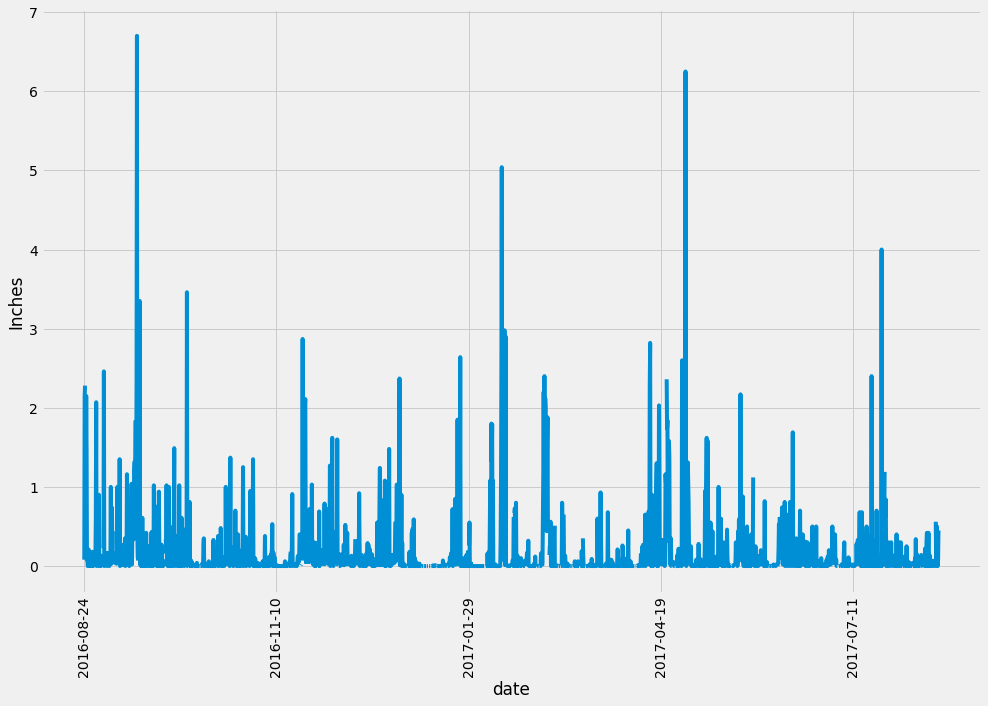

In [14]:
# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(measurement.date,measurement.prcp).filter(measurement.date > year_ago).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_scores_start = pd.DataFrame(last_year_data)
precip_scores = precip_scores_start.set_index("date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_scores.plot(kind='line',figsize=(15,10),ylabel='Inches',legend=False,rot=90)


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_scores.describe()

# Exploratory Station Analysis

In [ ]:
data = engine.execute("SELECT * FROM station")
data.keys()

In [ ]:
# Design a query to calculate the total number stations in the dataset
station_num = session.query(station.station).group_by(station.station).count()
station_num

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(measurement.station,func.count(measurement.station)).\
           group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stations

In [ ]:
#List best station
best_station = stations[0][0]
best_station

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measurement.tobs),func.avg(measurement.tobs),func.max(measurement.tobs)).\
                      filter(measurement.station == best_station).all()
temps
# Lowest, Average, Highest

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_temps = session.query(measurement.date,measurement.tobs).\
                  filter(measurement.date > year_ago).\
                  filter(measurement.station == best_station).\
                  group_by(measurement.date).all()
last_year_temps

In [ ]:
best_year_df = pd.DataFrame(last_year_temps,columns=["Date","Temperature"])
best_year_df.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperatures Reported for " + best_station)
plt.show()


# Close session

In [ ]:
# Close Session
session.close()